In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from array import array

Section 1 - Loading data


Load the file "bakar_monthly_new.txt" 

In [4]:
# Load data
data = np.loadtxt('bakar_monthly_new.txt', delimiter=';')

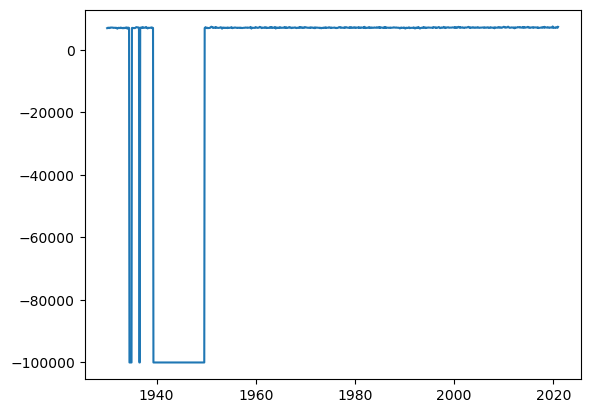

In [5]:
# Section 2 - Plotting data - first attempt
plt.figure()

# Plot time on x-axis (bakar_monthly[:,0]) and sea level on y-axis
plt.plot(data[:, 0], data[:, 1])

Text(0.5, 1.0, 'Bakar')

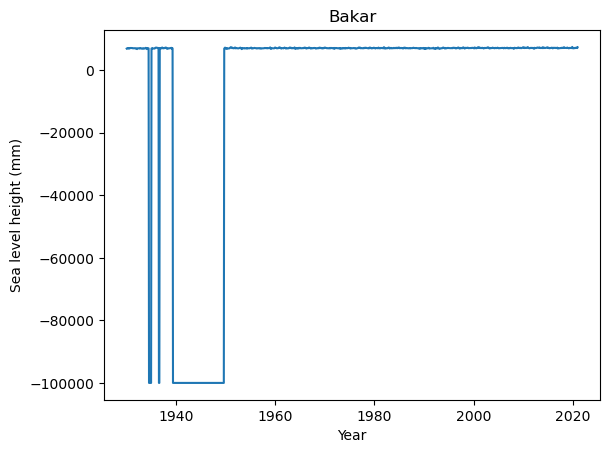

In [6]:
# Section 2 - Plotting data - first attempt
plt.figure()

# Plot time on x-axis (bakar_monthly[:,0]) and sea level on y-axis
plt.plot(data[:, 0], data[:, 1])

# Add labels to axes
plt.xlabel('Year')
plt.ylabel('Sea level height (mm)')

# Add title
plt.title('Bakar')

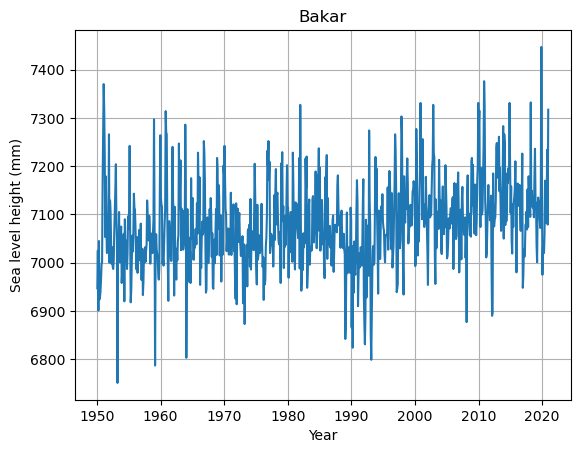

In [7]:

# Section 3 - Keeping only reliable data
data = data[240:, 0:2]

plt.figure()

# Plot time on x-axis (bakar_monthly[:,0]) and sea level on y-axis
plt.plot(data[:, 0], data[:, 1])

# Add labels to axes
plt.xlabel('Year')
plt.ylabel('Sea level height (mm)')

# Add title
plt.title('Bakar')

plt.grid(True)  # Add the grid

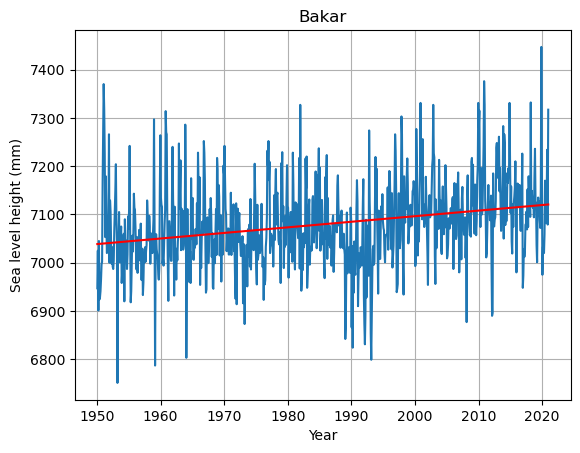

In [8]:
#  Add trend

plt.figure()

# Plot time on x-axis (bakar_monthly[:,0]) and sea level on y-axis
plt.plot(data[:, 0], data[:, 1])

# Add labels to axes
plt.xlabel('Year')
plt.ylabel('Sea level height (mm)')

# Add title
plt.title('Bakar')

plt.grid(True)  # Add the grid
# Section 5 - Estimate trend using linear regression
# Create a linear regression model 
model = LinearRegression()

# Fit the model to our data
# First format data as required
X = data[:, 0].reshape(-1,1)
y = data[:, 1]

model.fit(X,y)

# slope and intercept; y = ax + b; a = slope; b = intercept
slope = model.coef_[0]
intercept = model.intercept_

# add to plot
plt.plot(data[:, 0],slope*data[:, 0]+intercept,color='red')

Text(0.5, 1.0, 'Bakar')

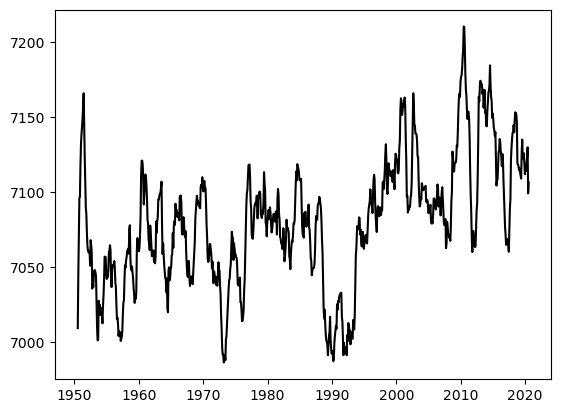

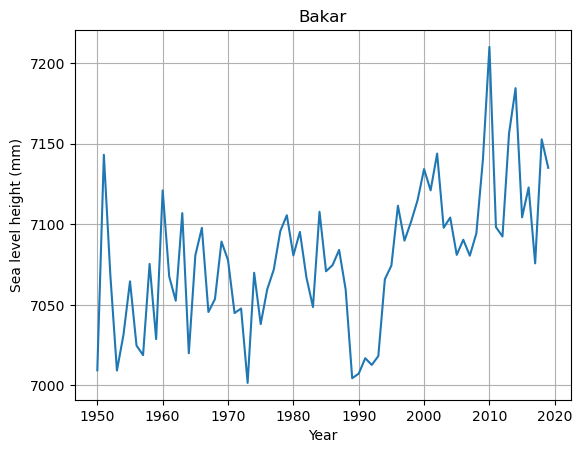

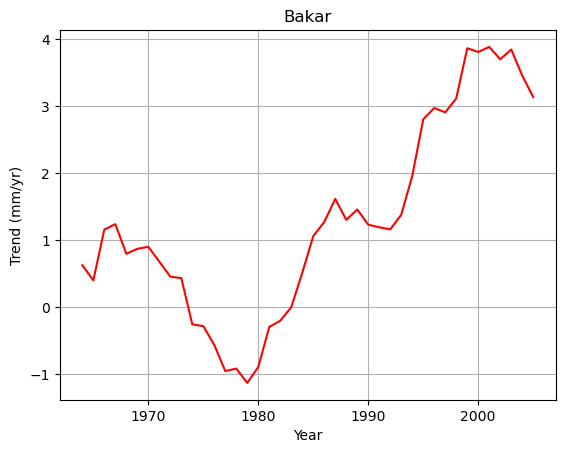

In [9]:
# Section 6 
# but is trend constant? 

# estimate and plot moving average
window = np.ones(12)/12
moving_average=np.convolve(y,window,mode='valid')
plt.figure()
plt.plot(data[6:847, 0],moving_average,color='k')
plt.xlabel('Year')
plt.ylabel('Sea level height (mm)')
plt.title('Bakar - moving averages')

# what if we check shorter period trends? Is sea level rise accelerating
# 1st estimate yearly averages

ymsl = []
T = list(range(1950,2020,1))
T = np.array(T)

for t in range(1,71):
    YYYY_AV = np.average(data[12*(t-1):12*t, 1])
    ymsl.append(YYYY_AV)

# yearly mean sea level - ymsl
ymsl = np.array(ymsl)  

plt.figure()
plt.plot(T,ymsl)
plt.xlabel('Year')
plt.ylabel('Sea level height (mm)')
plt.title('Bakar - yearly averages')
plt.grid(True)  # Add the grid


slope15 = []
intercept15 = []


for t in range(15,57):
    model_15 = LinearRegression()

    # Fit the model to our data
    # First format data as required
    T_15 = T[t-15:t+15].reshape(-1,1)
    ymsl_15 = ymsl[t-15:t+15]

    model_15.fit(T_15,ymsl_15)
    
    slope_temp = model_15.coef_[0]
    intercept_temp = model_15.intercept_
    
    slope15.append(slope_temp)
    intercept15.append(intercept_temp)

plt.figure()
plt.plot(range(1964,2006),slope15,color='red')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Trend (mm/yr)')    
plt.title('Bakar - 30 year trends')

In [10]:
# Section 7 - Prepare time series for further analysis
# Year (yyyy) is obtained by rounding down ("floor") the first column of bakar_monthly
yyyy = np.floor(data[:, 0])  # Column vector of year values

# Month (mm) is obtained as
mm = (data[:, 0] - yyyy) * 12
mm = np.ceil(mm)  # Column vector of month values

# Sea level height is in the last column
msl = data[:, 1]  # Column vector of sea level values

# Combine everything into one new variable to be used in further analysis
SeaLevel_Station01 = np.column_stack((yyyy, mm, msl))  # Matrix (852x3) of year, month, sea level

# Save for further use
np.savetxt('sea_level_practical.txt', SeaLevel_Station01,fmt = "%d")